# Prediccion de financiamiento del sector privado en México - SARIMA

## Librerias

In [226]:
#pip install pmdarima

In [227]:
import pandas as pd
from pmdarima import auto_arima

## Data

In [228]:
df = pd.read_csv("C:/Users/juanj/Workspace/business_Intelligence/PRONOSTICO-JERARQUICO/FSPATC.csv",
            index_col="Fecha",
            parse_dates=True,
            skiprows=8)
df.head()

,SF17926,SF17927,SF46380,SF46381,SF17929,SF17930,SF46382,SF46383,SF17932,SF17933,SF46384,SF46385,SF46386,SF
Fecha,,,,,,,,,,,,,,
1996-10-01,41828.0,36373.4,1407.3,4047.3,304706.2,215689.6,1357.9,87658.8,1103253.3,589846.8,53123.8,193070.2,267212.5,1449787.5
1997-01-01,41515.9,33522.7,2852.6,5140.6,329182.3,237084.6,2731.9,89365.9,1119695.0,617126.9,36780.0,185345.2,280442.8,1490393.2
1997-04-01,41405.0,33111.0,3235.2,5058.8,337529.2,241438.8,3514.2,92576.2,1161120.6,615381.3,36939.7,203997.2,304802.5,1540054.8
1997-07-01,43660.9,34972.5,3773.4,4915.0,338939.1,240081.8,4538.9,94318.4,1118490.1,592079.0,35841.7,185087.5,305481.7,1501090.1
1997-10-01,46330.2,35470.2,4567.3,6292.7,343624.6,240742.9,5607.1,97274.6,1175248.7,608626.9,39324.0,210084.2,317213.5,1565203.5


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 1996-10-01 to 2023-04-01
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SF17926  107 non-null    float64
 1   SF17927  107 non-null    float64
 2   SF46380  107 non-null    float64
 3   SF46381  107 non-null    float64
 4   SF17929  107 non-null    float64
 5   SF17930  107 non-null    float64
 6   SF46382  107 non-null    float64
 7   SF46383  107 non-null    float64
 8   SF17932  107 non-null    float64
 9   SF17933  107 non-null    float64
 10  SF46384  107 non-null    float64
 11  SF46385  107 non-null    float64
 12  SF46386  107 non-null    float64
 13  SF       107 non-null    float64
dtypes: float64(14)
memory usage: 12.5 KB


## Entrenamiento

In [230]:
training = df.iloc[:-30,:]
test = df.iloc[-30:,:]

## Modelo SARIMA

In [231]:
model =auto_arima(y = training.SF, m = 7)

In [236]:
training = df.iloc[:-30,:]
test = df.iloc[-30:,:]
model =auto_arima(y = training.SF, m = 7)
#prediccion
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions

Fecha
2016-01-01    9.099345e+06
2016-04-01    9.299975e+06
2016-07-01    9.500605e+06
2016-10-01    9.701235e+06
2017-01-01    9.901865e+06
2017-04-01    1.010249e+07
2017-07-01    1.030312e+07
2017-10-01    1.050375e+07
2018-01-01    1.070438e+07
2018-04-01    1.090501e+07
2018-07-01    1.110564e+07
2018-10-01    1.130627e+07
2019-01-01    1.150690e+07
2019-04-01    1.170753e+07
2019-07-01    1.190816e+07
2019-10-01    1.210879e+07
2020-01-01    1.230942e+07
2020-04-01    1.251005e+07
2020-07-01    1.271068e+07
2020-10-01    1.291131e+07
2021-01-01    1.311194e+07
2021-04-01    1.331257e+07
2021-07-01    1.351320e+07
2021-10-01    1.371383e+07
2022-01-01    1.391446e+07
2022-04-01    1.411509e+07
2022-07-01    1.431572e+07
2022-10-01    1.451635e+07
2023-01-01    1.471698e+07
2023-04-01    1.491761e+07
dtype: float64

<Axes: xlabel='Fecha'>

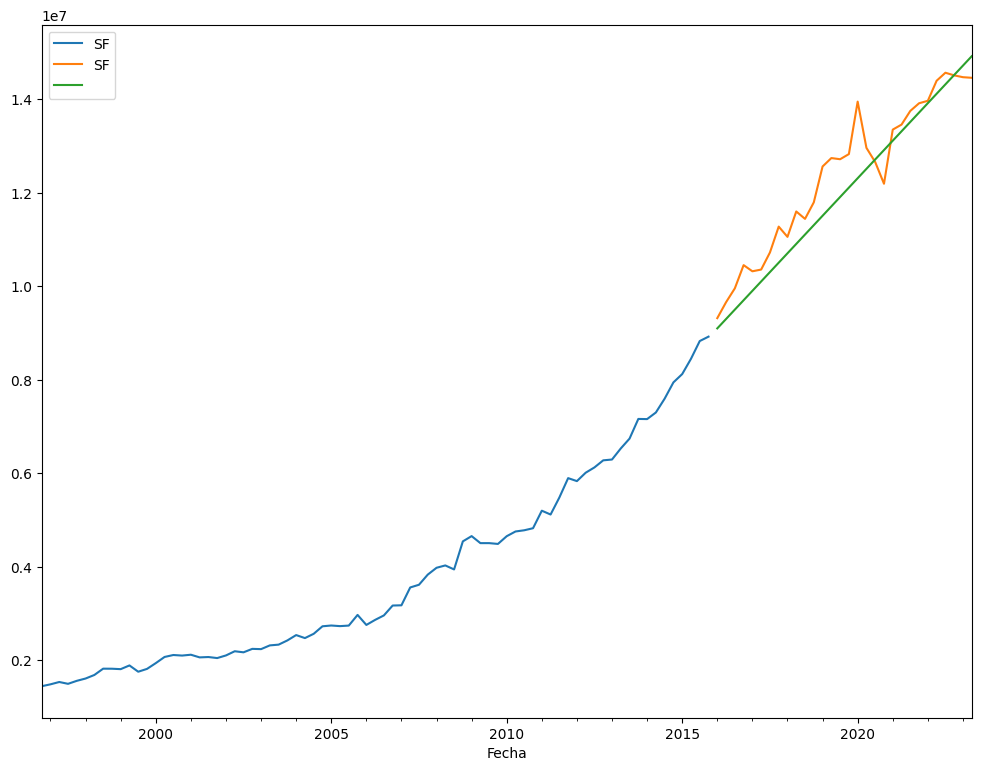

In [233]:
# visualization
training['SF'].plot(figsize=(12,9), legend=True)
test['SF'].plot( legend=True)
predictions.plot(legend=True)

## PRONOSTICO DE JERARQUIA

In [234]:
import numpy as np

In [235]:
# generando matrix S 10 x 14

S =  np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0 ,0],
    [0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1],
])
S1 = np.linalg.inv(np.dot(S.T,S))
S2 = np.dot(S,S1)
S3 = np.dot(S2,S.T)


Y = np.array(predictions)
Yn = np.dot(S3,Y)
Yn


ValueError: shapes (14,14) and (30,) not aligned: 14 (dim 1) != 30 (dim 0)

In [ ]:
print(S3)


[[ 0.6969697   0.22727273  0.22727273  0.24242424  0.07575758  0.07575758
   0.07575758  0.07575758  0.07575758  0.07575758  0.06060606  0.06060606
   0.06060606  0.06060606]
 [ 0.22727273  0.57954545 -0.17045455 -0.18181818  0.19318182  0.19318182
   0.19318182 -0.05681818 -0.05681818 -0.05681818 -0.04545455 -0.04545455
  -0.04545455 -0.04545455]
 [ 0.22727273 -0.17045455  0.57954545 -0.18181818 -0.05681818 -0.05681818
  -0.05681818  0.19318182  0.19318182  0.19318182 -0.04545455 -0.04545455
  -0.04545455 -0.04545455]
 [ 0.24242424 -0.18181818 -0.18181818  0.60606061 -0.06060606 -0.06060606
  -0.06060606 -0.06060606 -0.06060606 -0.06060606  0.15151515  0.15151515
   0.15151515  0.15151515]
 [ 0.07575758  0.19318182 -0.05681818 -0.06060606  0.73106061 -0.26893939
  -0.26893939 -0.01893939 -0.01893939 -0.01893939 -0.01515152 -0.01515152
  -0.01515152 -0.01515152]
 [ 0.07575758  0.19318182 -0.05681818 -0.06060606 -0.26893939  0.73106061
  -0.26893939 -0.01893939 -0.01893939 -0.01893939 -

In [ ]:
df2 = pd.read_csv("C:/Users/juanj/Workspace/business_Intelligence/PRONOSTICO-JERARQUICO/FSPATC.csv",
            skiprows=8)
fecha = df2['Fecha']
fff=fecha[-14:]
fff = pd.DataFrame(fff)
fff = fff['Fecha'].tail(14)
fff.reset_index(drop=True, inplace=True)
fff= pd.DataFrame(fff)

In [ ]:
NYn = pd.DataFrame(Yn)
NYn['fecha'] = fff['Fecha']
NYn

,0,fecha
0,2.886462e+07,1/1/2020
1,8.704410e+06,4/1/2020
2,9.369032e+06,7/1/2020
3,1.079118e+07,10/1/2020
4,2.679929e+06,1/1/2021
5,2.901470e+06,4/1/2021
6,3.123011e+06,7/1/2021
7,2.901470e+06,10/1/2021
8,3.123011e+06,1/1/2022
9,3.344551e+06,4/1/2022


In [ ]:
NYn.set_index('fecha', inplace=True)
NYn

,0
fecha,
1/1/2020,2.886462e+07
4/1/2020,8.704410e+06
7/1/2020,9.369032e+06
10/1/2020,1.079118e+07
1/1/2021,2.679929e+06
4/1/2021,2.901470e+06
7/1/2021,3.123011e+06
10/1/2021,2.901470e+06
1/1/2022,3.123011e+06


<Axes: xlabel='fecha'>

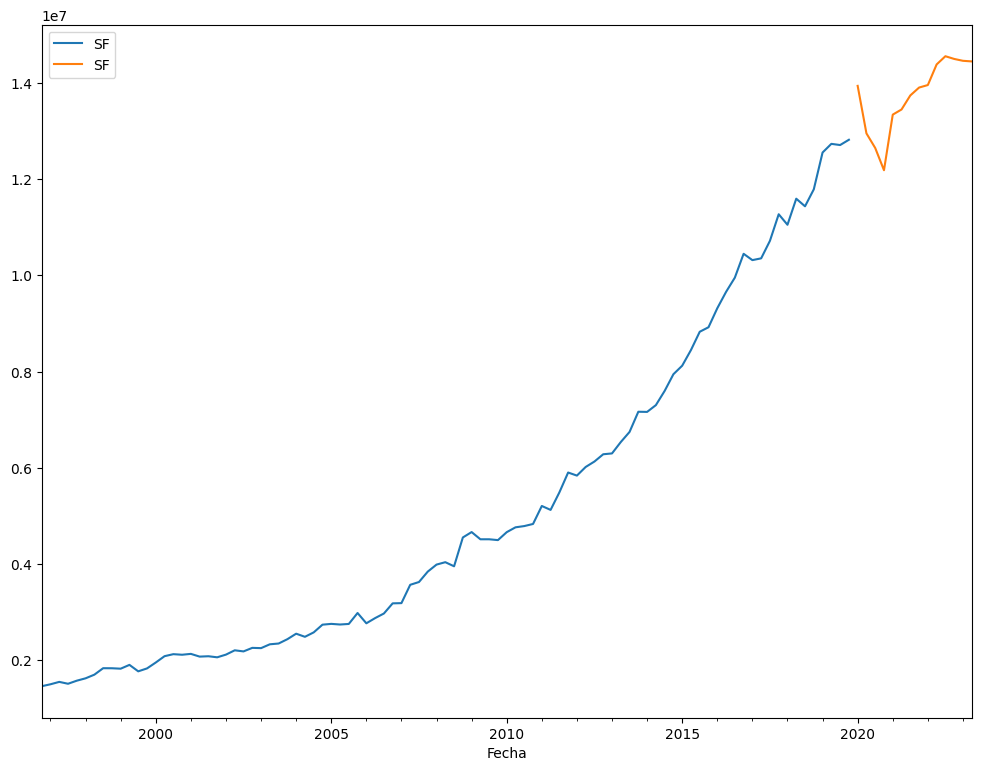

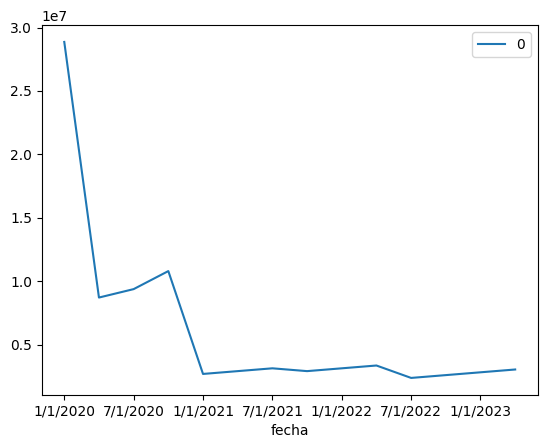

In [ ]:
# visualization
training['SF'].plot(figsize=(12,9), legend=True)
test['SF'].plot( legend=True)
NYn.plot(legend=True)